In [2]:
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Clinical Trials Data Analysis
### database: clinicaltrials.gov

Throughout this notebook, various graphs are presented using different filters. One thing to highlight is the difference between URLs, mainly between:

* https://classic.clinicaltrials.gov/api/query/study_fields?expr=
* https://classic.clinicaltrials.gov/api/query/field_values?expr=

The former retrieves a dataframe with specified columns (e.g., Completion Date, Condition, Phase, etc.) with a maximum set of records of 1000. The latter returns the number of studies found (NStudiesFound) that meet the filters specified by the user.

## Index:
1. [Body parts](#Body-parts)


2. [Scans analysis](#Scans-analysis) <br>
    2.1. [Different types of scans](#Different)<br>
    2.2. [Scans and body parts](#Scans)<br>
    2.3. [Video vs Imaging Scans](#Video) <br>
    
3. [Ultrasound](#Ultrasound)<br>
    3.1. [Ultrasound types](#Ultrasound-types)<br>
    3.2. [Echocardiograms](#Echocardiograms)<br>
    3.3. [Industry and Research Centers](#Industry)<br>
    3.4. [Phases](#Phases)<br>
    3.5. [Terminated](#Terminated)<br>
4. [Movement Disease](#Movement)<br>
    4.1 [Parkinson, Epilepsy, Multiple Sclerosis and Movement Diseases Analysis](#Parkinson)<br>
    4.2 [Parkinson, Epilepsy and Multiple Sclerosis Top Sponsors](#Epilepsy)<br>
    4.3 [Movment Diseases and Other Diseases Enrollment Count](#mov_dis)<br>
    4.4 [Gait Analysis](#gait)

# Body parts <a class="anchor" id="Body-parts"></a>
In the cells below, the number of clinical trials meeting the following criteria is presented:

* Trials with detailed description pertaining to the following body parts: brain,heart,liver,eye,stomach,lung and kidney
* Trials set to be completed from 2019 onwards.
* Trials set in the US
* Trials which their primary sponsor are not goverment

[3860, 4178, 1350, 1321, 621, 2886, 1993]


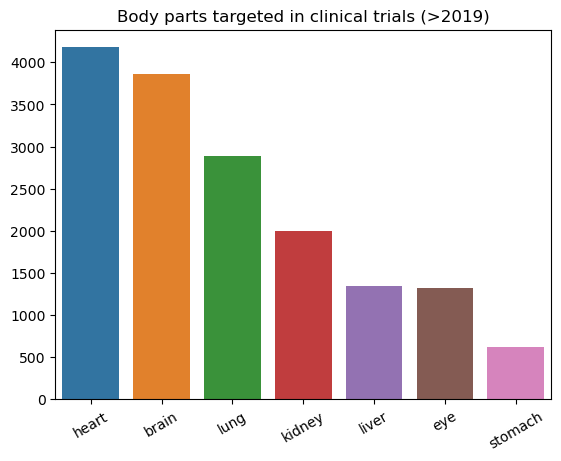

In [8]:
body_parts=['brain','heart','liver','eye','stomach','lung','kidney']
url_all='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_description='+AND+SEARCH[Study](AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)+AND+AREA[DetailedDescription]'
search_date='+AND+AREA[LocationCountry]United+States+AND+AREA[CompletionDate]RANGE[2019,MAX])'
params='&field=Condition&fmt=xml'

body_part_values=[]
for body_part in body_parts:
    body_part_values.append(int(pd.read_xml(url_all+search_description+body_part+search_date+params).NStudiesFound.dropna()))
print(body_part_values)

body_parts_sorted=[x for _,x in sorted(zip(body_part_values,body_parts),reverse=True)]
body_part_values_sorted=sorted(body_part_values,reverse=True)
plot=sns.barplot(x=body_parts_sorted, y=body_part_values_sorted)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
plot.set(title='Body parts targeted in clinical trials (>2019)')
plt.show()

[[368. 425. 418. 443. 368. 479. 429.]
 [431. 500. 478. 477. 437. 515. 456.]
 [147. 146. 160. 149. 142. 144. 145.]
 [131. 133. 177. 161. 148. 176. 157.]
 [ 66.  58.  76.  80.  65.  64.  50.]
 [271. 332. 338. 276. 357. 359. 268.]
 [210. 216. 223. 237. 208. 232. 184.]]


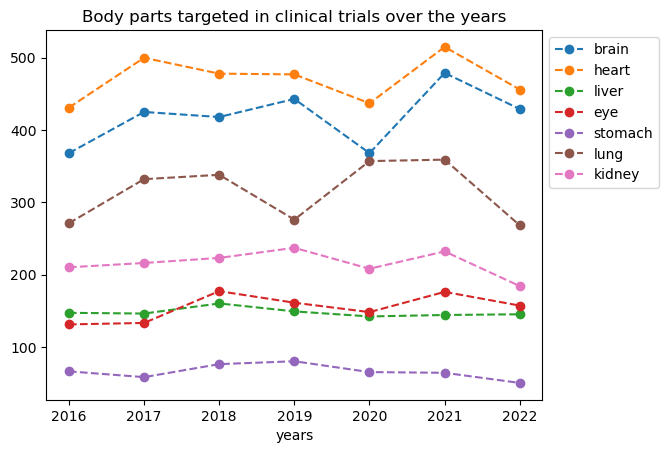

In [10]:
years=range(2016,2023)
search_description='+AND+SEARCH[Study](AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)+AREA[DetailedDescription]'
search_status_date='+AND+AREA[LocationCountry]United+States+AND+AREA[OverallStatus]NOT+unknown+AND+AREA[StartDate]'
params=')&field=Condition&fmt=xml'

body_over_time=np.zeros((len(body_parts),len(years)))
i=0
for i in range(len(body_parts)):
    for year in years:
        body_over_time[i][year-2016]=int(pd.read_xml(url_all+search_description+body_parts[i]+
                                                  search_status_date+str(year)+params).NStudiesFound.dropna())

print(body_over_time)
i=0
for body_part in body_over_time:
    plt.plot(body_part,label=body_parts[i],marker='o',linestyle='--')
    i=i+1
plt.legend(bbox_to_anchor=(1,1))
plt.title('Body parts targeted in clinical trials over the years')
plt.xlabel('years')
plt.xticks(np.arange(len(years)),years)
plt.show()

# Scans analysis <a class="anchor" id="Scans-analysis"></a>

### Different types of scans <a class="anchor" id="Different"></a>
In the cells below, the number of clinical trials meeting the following criteria is presented:

* Trials with eligibility criteria (inclusion or exclusion) involving the use of endoscopy, CT, ultrasound, MRI, X-ray, fluoroscopy and PET.
* Trials set to be completed from 2019 onwards (with the exception of the second graph).
* Trials set in the US
* Trials which their primary sponsor are not goverment

[8152, 5262, 3579, 1915, 1863, 1212, 39]


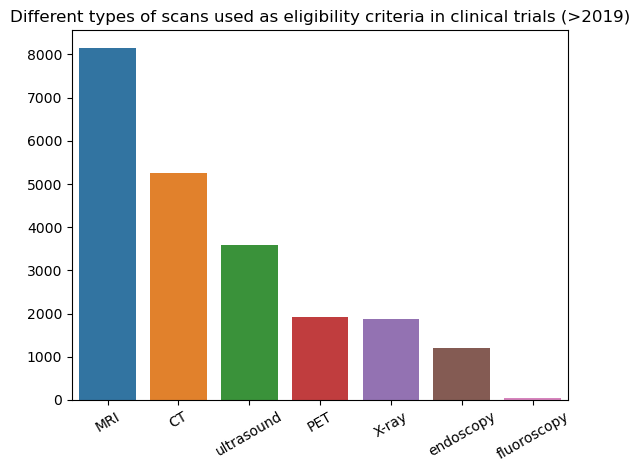

In [12]:
scans=['endoscopy','CT','ultrasound','MRI','X-ray','fluoroscopy','PET']
url_all='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_elig_crit='+AND+SEARCH[Study](AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)+AND+AREA[EligibilityCriteria]'
search_date='+AND+AREA[LocationCountry]United+States+AND+AREA[CompletionDate]RANGE[2019,MAX])'
params='&field=Condition&fmt=xml'

scan_values=[]
for scan in scans:
    if scan=='ultrasound':
        scan_values.append(int(pd.read_xml(url_all+search_elig_crit+'('+scan+'+OR+echocardiogram)'
                                           +search_date+params).NStudiesFound.dropna()))
    else:
        scan_values.append(int(pd.read_xml(url_all+search_elig_crit+scan+search_date+params).NStudiesFound.dropna()))
scans_sorted=[x for _,x in sorted(zip(scan_values,scans),reverse=True)]
scan_values_sorted=sorted(scan_values,reverse=True)
plot=sns.barplot(x=scans_sorted, y=scan_values_sorted)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
plot.set(title='Different types of scans used as eligibility criteria in clinical trials (>2019)')
print(scan_values_sorted)
plt.show()

[7362, 5092, 3361, 1751, 1763, 1099, 37]
[5787, 4273, 2967, 1049, 2092, 1105, 35]
[459, 324, 264, 60, 155, 77, 3]


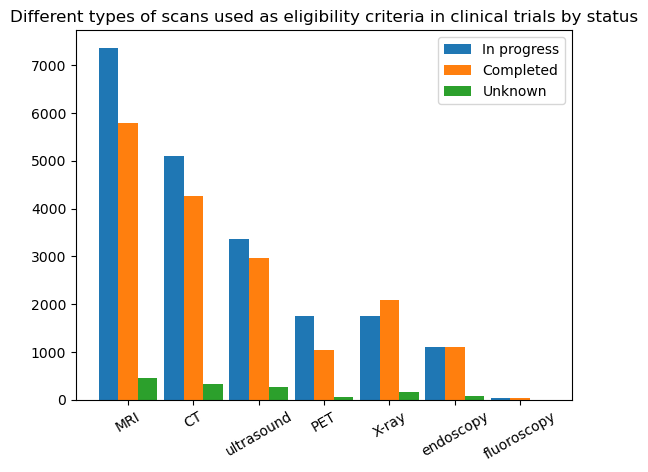

In [13]:
url_all='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_elig_crit='+AND+SEARCH[Study](AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)+AND+AREA[EligibilityCriteria]'
search_status='+AND+AREA[LocationCountry]United+States+AND+AREA[OverallStatus]'
params=')&field=Condition&fmt=xml'
scan_values_in_progress, scan_values_completed, scan_values_unknown =[],[],[]
for scan in scans_sorted:
    if scan=='ultrasound':
        scan='('+scan+'+OR+echocardiogram)'
    scan_values_in_progress.append(int(pd.read_xml(url_all+search_elig_crit+scan+search_status+
                                                   'NOT+completed+AND+NOT+unknown+AND+NOT+Terminated'
                                                   +params).NStudiesFound.dropna()))
    scan_values_completed.append(int(pd.read_xml(url_all+search_elig_crit+scan+search_status+
                                                   'completed'+params).NStudiesFound.dropna()))
    scan_values_unknown.append(int(pd.read_xml(url_all+search_elig_crit+scan+search_status+
                                                   'unknown'+params).NStudiesFound.dropna()))
print(scan_values_in_progress,scan_values_completed,scan_values_unknown,sep='\n')

x=np.arange(len(scans_sorted))
plt.bar(x-0.3,scan_values_in_progress , 0.3, label = 'In progress',color='tab:blue')
plt.bar(x, scan_values_completed, 0.3, label = 'Completed',color='tab:orange')
plt.bar(x+0.3, scan_values_unknown, 0.3, label = 'Unknown',color='tab:green')
plt.xticks(x,scans_sorted,rotation=30)
plt.title('Different types of scans used as eligibility criteria in clinical trials by status')
plt.legend()
plt.show()

[[139. 158. 149. 137. 126. 160. 135.]
 [479. 598. 603. 529. 611. 616. 510.]
 [371. 407. 393. 397. 405. 408. 384.]
 [805. 905. 945. 938. 838. 959. 878.]
 [200. 224. 228. 201. 277. 232. 183.]
 [  3.   5.   6.   3.   4.   5.   3.]
 [176. 191. 226. 195. 195. 228. 208.]]


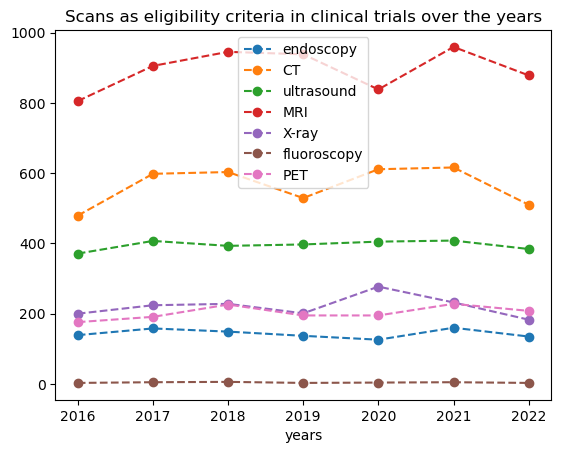

In [18]:
years=range(2016,2023)
url_all='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_elig_crit='+AND+SEARCH[Study](AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)+AND+AREA[EligibilityCriteria]'
search_status_date='+AND+AREA[LocationCountry]United+States+AND+AREA[StartDate]'
params=')&field=Condition&fmt=xml'

scans_over_time=np.zeros((len(scans),len(years)))
i=0
for i in range(len(scans)):
    scan=scans[i]
    if scan=='ultrasound':
        scan='('+scan+'+OR+echocardiogram)'
    for year in years:
        scans_over_time[i][year-2016]=int(pd.read_xml(url_all+search_elig_crit+scan+
                                                  search_status_date+str(year)+params).NStudiesFound.dropna())
print(scans_over_time)
i=0
for scan_type in scans_over_time:
    plt.plot(scan_type,label=scans[i],marker='o',linestyle='--')
    i=i+1
plt.legend()
plt.title('Scans as eligibility criteria in clinical trials over the years')
plt.xlabel('years')
plt.xticks(np.arange(len(years)),years)
plt.show()

[[  26486.   48708.   30530.   48191.  104925.   69912.  367685.]
 [  89237.  213585.  105796.  302022.  188899.  114754.  127975.]
 [  59383.  526119.   67033.  176242.  449259.  125581.   95106.]
 [1471491.  550211.  119859.  129005.  136967.  132430.  159904.]
 [  35598.   41089.   45423.   45125.   59434.   75742.   62808.]
 [    336.     220.     545.     429.     558.     244.      93.]
 [  43330.   18466.   19590.   24241.   37524.   33122.   23586.]]


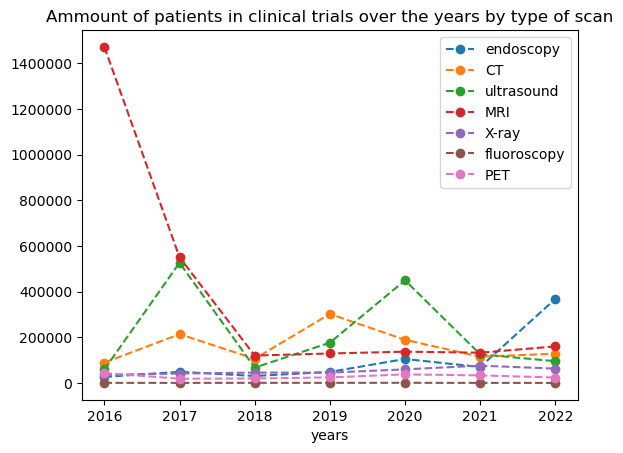

In [28]:
url='https://classic.clinicaltrials.gov/api/query/study_fields?expr=ALL'
search_elig_crit='+AND+SEARCH[Study](AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)+AND+AREA[EligibilityCriteria]'
search_status_date='+AND+AREA[LocationCountry]United+States+AND+AREA[StartDate]'
params=')&min_rnk&max_rnk=1000&fields=EnrollmentCount&fmt=csv'

patients_over_time=np.zeros((len(scans),len(years)))
for i in range(len(scans)):
    scan=scans[i]
    if scan=='ultrasound':
        scan='('+scan+'+OR+echocardiogram)'
    for year in years:
        df_Enrollment=pd.read_csv(url+search_elig_crit+scan+
                                    search_status_date+str(year)+params,skiprows=10)
        patients_over_time[i][year-2016]=int(df_Enrollment.EnrollmentCount.sum())
np.set_printoptions(suppress = True)
print(format(patients_over_time))

np.set_printoptions(suppress = True)
print(format(patients_over_time))
i=0
fig, ax= plt.subplots()
for scan_type in patients_over_time:
    plt.plot(scan_type,label=scans[i],marker='o',linestyle='--')
    i=i+1
plt.legend()
plt.title('Ammount of patients in clinical trials over the years by type of scan')
plt.xlabel('years')
ax.ticklabel_format(style='plain')

plt.xticks(np.arange(len(years)),years)
plt.show()

### Scans and body parts: <a class="anchor" id="Scans"></a>
In the cell below, the number of clinical trials meeting the following criteria is presented:

* Trials with detailed description pertaining to the following body parts: brain,heart,liver,eye,stomach,lung and kidney
* Trials with eligibility criteria (inclusion or exclusion) involving the use of endoscopy, CT,  ultrasound and MRI
* Trials set to be completed from 2019 onwards.

[1178, 867, 3423, 563, 771, 247, 245]
[111, 114, 59, 101, 222, 39, 487]
[699, 1489, 811, 551, 611, 95, 382]
[1330, 319, 213, 225, 425, 67, 134]


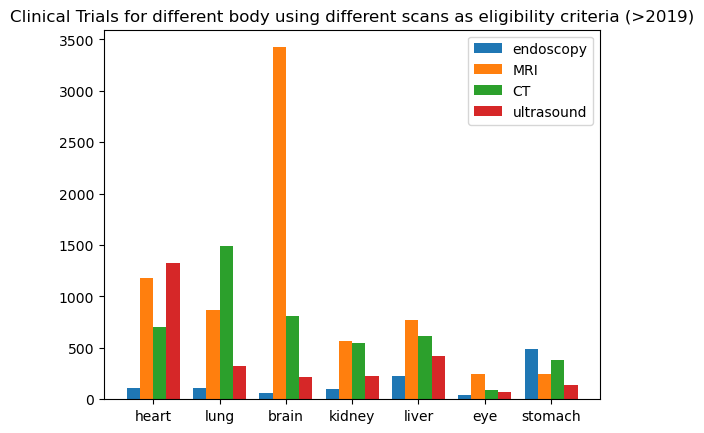

In [66]:
url_all='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_description='+AND+SEARCH[Study](AREA[DetailedDescription]'
search_elig_crit='+AND+AREA[EligibilityCriteria]'
search_date='+AND+AREA[CompletionDate]RANGE[2019,MAX])'
params='&field=Condition&fmt=xml'
body_part_values_endoscopy=[]
body_part_values_MRI=[]
body_part_values_CT=[]
body_part_values_ultrasound=[]
for body_part in body_parts_sorted:
    body_part_values_endoscopy.append(int(pd.read_xml(url_all+search_description+body_part+search_elig_crit+
                                                      'endoscopy'+search_date+params).NStudiesFound.dropna()))
    body_part_values_MRI.append(int(pd.read_xml(url_all+search_description+body_part+search_elig_crit+
                                                      'MRI'+search_date+params).NStudiesFound.dropna()))
    body_part_values_CT.append(int(pd.read_xml(url_all+search_description+body_part+search_elig_crit+
                                                      'CT'+search_date+params).NStudiesFound.dropna()))
    if body_part=='heart':
        body_part_values_ultrasound.append(int(pd.read_xml(url_all+search_description+body_part+search_elig_crit+
                                                      '(ultrasound+OR+echocardiogram)'+search_date+params).NStudiesFound.dropna()))
    else:
        body_part_values_ultrasound.append(int(pd.read_xml(url_all+search_description+body_part+search_elig_crit+
                                                      'ultrasound'+search_date+params).NStudiesFound.dropna()))
    
print(body_part_values_MRI,body_part_values_endoscopy,body_part_values_CT,body_part_values_ultrasound,sep='\n')

x=np.arange(len(body_parts_sorted))
plt.bar(x-0.3,body_part_values_endoscopy,0.2,label='endoscopy',color='tab:blue')
plt.bar(x-0.1,body_part_values_MRI,0.2,label='MRI',color='tab:orange')
plt.bar(x+0.1,body_part_values_CT,0.2,label='CT',color='tab:green')
plt.bar(x+0.3,body_part_values_ultrasound,0.2,label='ultrasound',color='tab:red')
plt.xticks(x,body_parts_sorted)
plt.title('Clinical Trials for different body using different scans as eligibility criteria (>2019)')
plt.legend()
plt.show()

### Video vs Imaging Scans <a class="anchor" id="Video"></a>

In the cells below, the number of clinical trials meeting the following criteria is presented:

* Trials with eligibility criteria (inclusion or exclusion) involving the use of ultrasound, echocardiogram, endoscopy, video assisted and fluoroscopy for video, and  CT, MRI, X-ray and PET for imaging.
* Trials set to be completed from 2019 onwards.

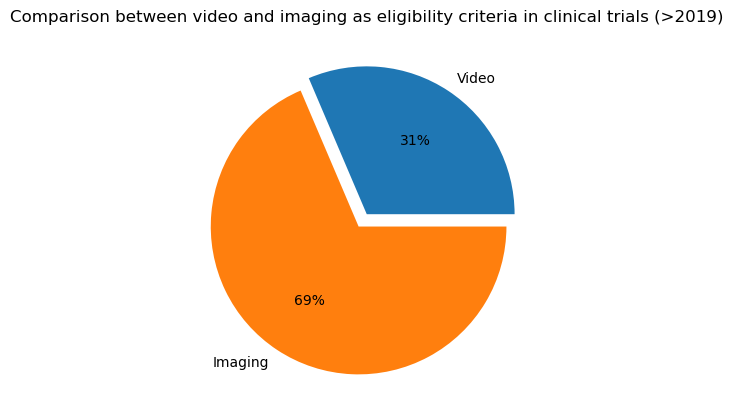

In [90]:
videos=['ultrasound','echocardiogram','endoscopy','video assisted','fluoroscopy']
imaging=['MRI','CT','PET','X-ray']
url='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_description='+AND+SEARCH[Study](AREA[EligibilityCriteria]'
search_date='+AND+AREA[CompletionDate]RANGE[2019,MAX])'
params='&field=Condition&fmt=xml'
video_string='('
imaging_string='('
for video,image in zip(videos,imaging):
    if image==imaging[len(imaging)-1]:
        video_string+=video+')'
        imaging_string+=image+')'
    else:
        video_string+=video+'+OR+'
        imaging_string+=image+'+OR+'
video_string=video_string.replace(' ','+')
video_value=int(pd.read_xml(url+search_description+video_string+search_date+params).NStudiesFound.dropna())
imaging_value=int(pd.read_xml(url+search_description+imaging_string+search_date+params).NStudiesFound.dropna())

plt.pie([video_value,imaging_value],labels=['Video','Imaging'],autopct='%1.0f%%',explode=[0,0.1])
plt.title('Comparison between video and imaging as eligibility criteria in clinical trials (>2019)')
plt.show()

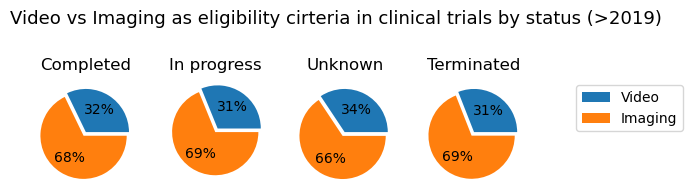

In [130]:
statuses=['Completed','In progress','Unknown','Terminated']
search_status='+AND+AREA[OverallStatus]'
status_video, status_imaging=[],[]
for status in statuses:
    if status=='In progress':
        status='NOT+Completed+AND+NOT+Unknown+AND+NOT+Terminated'
    status_video.append(int(pd.read_xml(url+search_description+video_string+search_status+status
                                              +search_date+params).NStudiesFound.dropna()))
    status_imaging.append(int(pd.read_xml(url+search_description+imaging_string+search_status+status
                                              +search_date+params).NStudiesFound.dropna()))

fig,axs=plt.subplots(1,4)
for j in range(len(statuses)):
    if body_parts_video[j]>body_parts_imaging[j]:
        exploded=[0.1,0]
    else:
        exploded=[0,0.1]
    axs[j].pie([status_video[j],status_imaging[j]],autopct='%1.0f%%',explode=exploded)
    axs[j].set_title(statuses[j])
fig.suptitle('Video vs Imaging as eligibility cirteria in clinical trials by status (>2019)',y=0.75,x=0.6,fontsize=13)
plt.legend(['Video','Imaging'],bbox_to_anchor=(2.5,1))
plt.show()

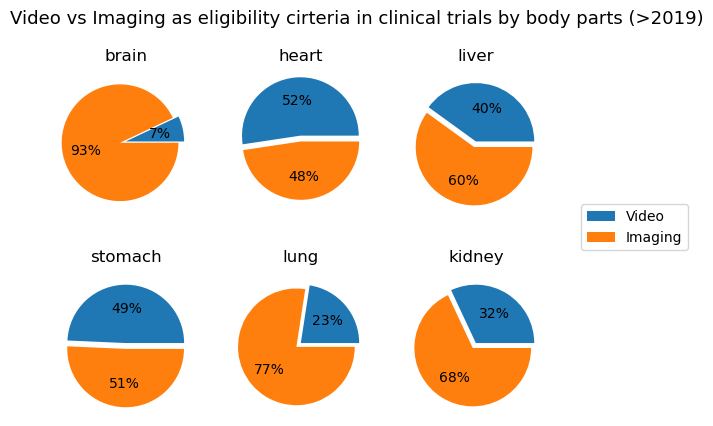

In [131]:
body_parts=['brain','heart','liver','stomach','lung','kidney']
search_part='+AND+AREA[Condition]'
body_parts_imaging, body_parts_video=[],[]
for body_part in body_parts:
    body_parts_imaging.append(int(pd.read_xml(url+search_description+imaging_string+search_part+body_part
                                              +search_date+params).NStudiesFound.dropna()))
    body_parts_video.append(int(pd.read_xml(url+search_description+video_string+search_part+body_part
                                            +search_date+params).NStudiesFound.dropna()))

fig,axs=plt.subplots(2,3)
i,j=0,0
for body_part in body_parts:
    if body_parts_video[j]>body_parts_imaging[j]:
        exploded=[0.1,0]
    else:
        exploded=[0,0.1]
    axs[i,j%3].pie([body_parts_video[j],body_parts_imaging[j]],autopct='%1.0f%%',explode=exploded)
    axs[i,j%3].set_title(body_part)
    j+=1
    if j>2:
        i=1
fig.suptitle('Video vs Imaging as eligibility cirteria in clinical trials by body parts (>2019)',fontsize=13,x=0.6)
plt.legend(['Video','Imaging'],bbox_to_anchor=(2,1.5))
plt.show()

# Ultrasound <a class="anchor" id="Ultrasound"></a>

### Ultrasound types: <a class="anchor" id="Ultrasound-types"></a>
In the cell below, the number of clinical trials meeting the following criteria is presented:

* Trials with eligibility criteria (inclusion or exclusion) involving the use of ultrasound in different regions of the body
* Trials set to be completed from 2019 onwards.

[669, 62, 1013, 215, 62, 610, 1994, 83, 101, 252, 454, 5, 506, 870, 4870, 1921, 1944, 760, 902, 273, 223]


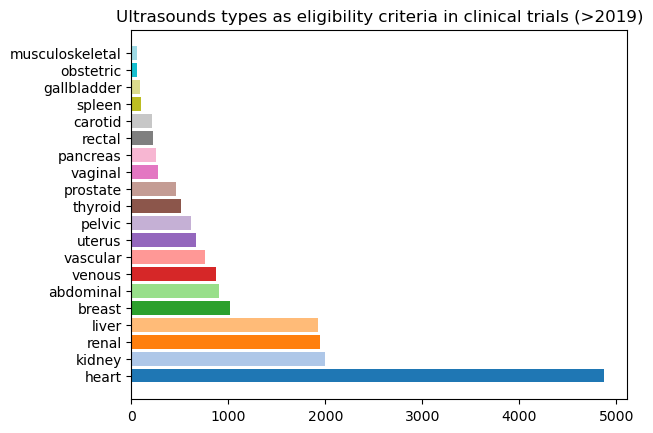

In [48]:
ultrasounds=['uterus','obstetric','breast','carotid','musculoskeletal','pelvic','kidney','gallbladder','spleen','pancreas',
             'prostate','scrotum','thyroid','venous','heart','liver','renal','vascular','abdominal','vaginal','rectal']
url_all='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_elig_crit='+AND+SEARCH[Study](AREA[EligibilityCriteria]('
search_date=')+AND+AREA[CompletionDate]RANGE[2019,MAX])'
params='&field=Condition&fmt=xml'
ultrasound_values=[]
for ultrasound in ultrasounds:
    if ultrasound=='uterus':
        ultrasound_values.append(int(pd.read_xml(url_all+search_elig_crit+ultrasound+'+ultrasound+OR+'+ultrasound+'+sonography'+
                                                 '+OR+hysterosonography+OR+sonohysterography'+search_date+params
                                                ).NStudiesFound.dropna()))
    elif ultrasound=='heart':
        ultrasound_values.append(int(pd.read_xml(url_all+search_elig_crit+ultrasound+'+ultrasound+OR+'+ultrasound+'+sonography'+
                                                 '+OR+echocardiogram'+search_date+params
                                                ).NStudiesFound.dropna()))
    else:
        ultrasound_values.append(int(pd.read_xml(url_all+search_elig_crit+ultrasound+'+ultrasound+OR+'+ultrasound+'+sonography'+
                                                 search_date+params).NStudiesFound.dropna()))

print(ultrasound_values)

ultrasounds_sorted=[x for _,x in sorted(zip(ultrasound_values,ultrasounds),reverse=True)][:20]
ultrasound_values_sorted=sorted(ultrasound_values,reverse=True)[:20] 
colors=matplotlib.colormaps['tab20']
i=0
for ultrasound,value in zip(ultrasounds_sorted,ultrasound_values_sorted):
    plt.barh(ultrasound,value,color=colors(i))
    i+=1
plt.title('Ultrasounds types as eligibility criteria in clinical trials (>2019)')
plt.show()

### Echocardiograms <a class="anchor" id="Echocardiograms"></a>
In the cells below, the number of clinical trials meeting the following criteria is presented:

* Trials with eligibility criteria (inclusion or exclusion) involving the use of echocardiograms.
* Trials set to be completed from 2019 onwards.
* Trials with different type of conditions and parts of the heart

The code below is used to count the different types of conditions and their respective frequencies that appear in the dataset. Since we are using the first link (i.e., the one that retrieves the data frame), our word count only includes a subset of all studies. We utilize this information to create the graphs depicting various heart zones and conditions in the following sections.

In [3]:
url='https://classic.clinicaltrials.gov/api/query/study_fields?expr=echocardiogram'
search_elig_crit_heart='+AND+SEARCH[Study](AREA[EligibilityCriteria](heart+ultrasound+OR+heart+sonography+OR+echocardiogram)'
search_date_heart='+AND+AREA[CompletionDate]RANGE[2019,MAX])'
params='&min_rnk&max_rnk=1000&fields=Condition&fmt=csv'
df_heart=pd.read_csv(url+search_elig_crit_heart+search_date_heart+params,skiprows=10)
heart_diseases=df_heart['Condition'].unique().tolist()
big_string=''
for heart_disease in heart_diseases:
    big_string+=heart_disease+' '

words=list(big_string.replace('|',' ').split(' '))
words_frequency=[words.count(word) for word in words]
dic=dict(zip(words,words_frequency))
del dic['Cardiovascular'],dic['Heart'],dic['of'],dic['on'], dic['to'], dic['-'], dic['19'], dic['and'], dic['in'], dic['the']
del dic['Cancer,'], dic['Female'], dic['Echocardiography'], dic['Pacemaker'], dic['With']
dic={key:value for key,value in dic.items() if value >4}
sorted(dic.items(),key=lambda x:x[1],reverse=True)

[('Failure', 110),
 ('Disease', 102),
 ('Valve', 95),
 ('Aortic', 69),
 ('Regurgitation', 57),
 ('Pulmonary', 57),
 ('Mitral', 56),
 ('Ventricular', 53),
 ('Cardiac', 52),
 ('Cardiomyopathy', 49),
 ('Diseases', 46),
 ('Cancer', 45),
 ('Hypertension', 44),
 ('Left', 44),
 ('Stenosis', 41),
 ('Dysfunction', 40),
 ('Myocardial', 39),
 ('Acute', 39),
 ('Breast', 37),
 ('Congenital', 29),
 ('Recurrent', 27),
 ('Atrial', 26),
 ('Ejection', 24),
 ('Fraction', 24),
 ('Coronary', 23),
 ('Syndrome', 23),
 ('Chronic', 23),
 ('Leukemia', 22),
 ('Infarction', 21),
 ('Tricuspid', 21),
 ('Ischemic', 21),
 ('Diastolic', 19),
 ('Fibrillation', 19),
 ('Hypertrophic', 18),
 ('Insufficiency', 17),
 ('Artery', 16),
 ('Functional', 16),
 ('Amyloidosis', 15),
 ('Carcinoma', 15),
 ('Stage', 15),
 ('Systolic', 14),
 ('Myeloid', 14),
 ('Stroke', 13),
 ('Failure,', 13),
 ('Preserved', 13),
 ('Cardiotoxicity', 13),
 ('Neoplasm', 13),
 ('Right', 12),
 ('Lymphoma', 12),
 ('Dilated', 11),
 ('Malignant', 11),
 ('Shoc

[45, 118, 151, 35, 231, 151, 108, 87]


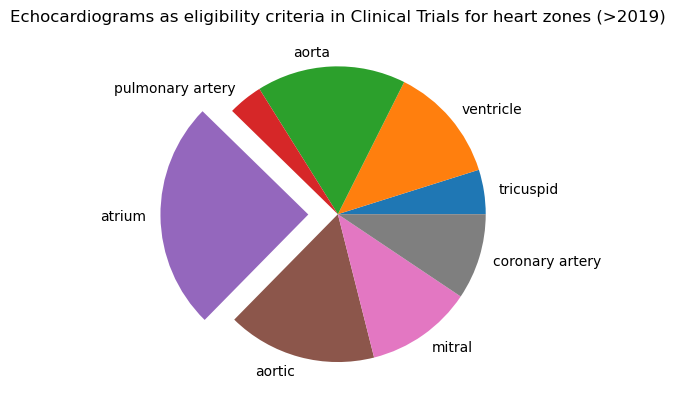

In [50]:
heart_zones=['tricuspid','ventricle','aorta','pulmonary+artery','atrium','aortic','mitral','coronary+artery']
url_all='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_ult_heart='+AND+SEARCH[Study](AREA[EligibilityCriteria](heart+ultrasound+OR+heart+sonography+OR+echocardiogram)'
search_zone='+AND+AREA[Condition]'
search_date='+AND+AREA[CompletionDate]RANGE[2019,MAX])'
params='&field=Condition&fmt=xml'
heart_zone_values=[]
for heart_zone in heart_zones:
    heart_zone_values.append(int(pd.read_xml(url_all+search_ult_heart+search_zone+heart_zone+search_date+
                                           params).NStudiesFound.dropna()))
print(heart_zone_values)

heart_zones=[heart_zone.replace('+',' ') for heart_zone in heart_zones]
plt.pie(heart_zone_values,labels=heart_zones,explode=[0,0,0,0,0.2,0,0,0])
plt.title('Echocardiograms as eligibility criteria in Clinical Trials for heart zones (>2019)')
plt.show()

[469, 450, 427, 354, 348, 208, 143, 136, 131, 122, 93, 55, 53, 32, 31, 16]


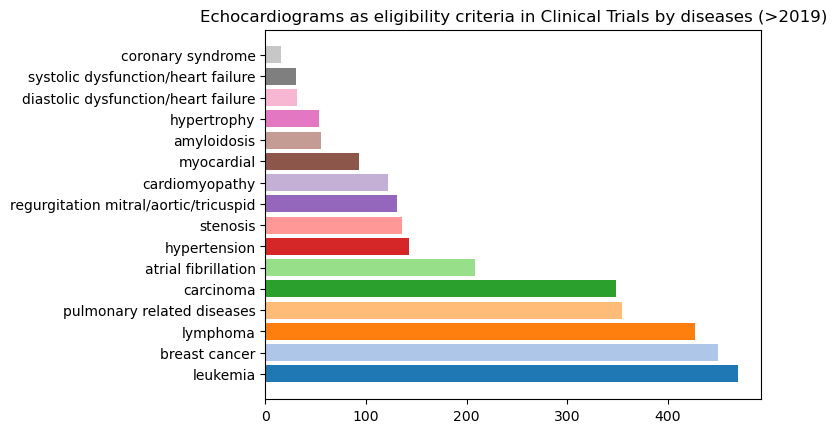

In [60]:
heart_diseases=['pulmonary','regurgitation','cardiomyopathy','hypertension','stenosis','myocardial','breast',
                'coronary+syndrome','leukemia','diastolic','atrial+fibrillation','hypertrophy','amyloidosis',
               'systolic','carcinoma','lymphoma']
url_all='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_ult_heart='+AND+SEARCH[Study](AREA[EligibilityCriteria](heart+ultrasound+OR+heart+sonography+OR+echocardiogram)'
search_disease='+AND+AREA[Condition]'
search_date='+AND+AREA[CompletionDate]RANGE[2019,MAX])'
params='&field=Condition&fmt=xml'
heart_disease_values=[]
for heart_disease in heart_diseases:
    heart_disease_values.append(int(pd.read_xml(url_all+search_ult_heart+search_disease+heart_disease+search_date+
                                           params).NStudiesFound.dropna()))
print(sorted(heart_disease_values,reverse=True))
heart_diseases_sorted=[x.replace('tolic','tolic dysfunction/heart failure') for _,x in sorted(zip(heart_disease_values,heart_diseases),reverse=True)]
heart_diseases_sorted=[x.replace('+',' ') for x in heart_diseases_sorted]
heart_diseases_sorted=[x.replace('tation','tation mitral/aortic/tricuspid') for x in heart_diseases_sorted]
heart_diseases_sorted=[x.replace('breast','breast cancer') for x in heart_diseases_sorted]
heart_diseases_sorted=[x.replace('pulmonary','pulmonary related diseases') for x in heart_diseases_sorted]
colors=matplotlib.colormaps['tab20']
i=0
for disease,value in zip(heart_diseases_sorted,sorted(heart_disease_values,reverse=True)):
    plt.barh(disease,value,color=colors(i))
    i+=1
plt.title('Echocardiograms as eligibility criteria in Clinical Trials by diseases (>2019)')
plt.show()

### Industry and Research Centers  <a class="anchor" id="Industry"></a>

In the cells below, the number of clinical trials meeting the following criteria is presented:

* Trials with eligibility criteria (inclusion or exclusion) involving the use of ultrasound.
* Trials set to be completed from 2019 onwards.
* Trials set in the United States 
* Trials whith sponsor that is not goverment 

[162, 109, 77, 52, 40, 37, 35, 34, 32, 31, 30, 29, 27, 26, 24, 22, 21, 20, 20, 17]


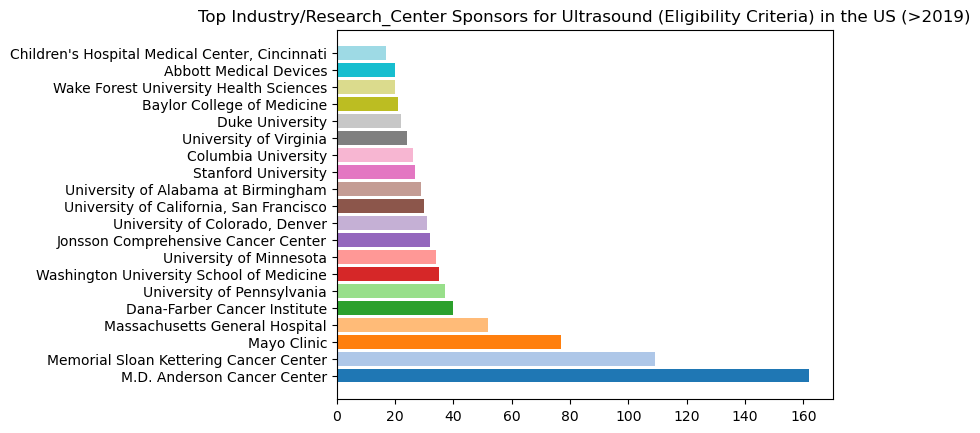

In [59]:
url_sample='https://classic.clinicaltrials.gov/api/query/study_fields?expr=ALL'
search_sponsor_sample='+AND+SEARCH[Study](AREA[EligibilityCriteria](ultrasound+OR+echocardiogram)+AND+AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)'
search_date_country='+AND+AREA[CompletionDate]RANGE[2019,MAX]+AND+AREA[LocationCountry]United+States)'
params_sample='&min_rnk&max_rnk=1000&fields=LeadSponsorClass%2CLeadSponsorName&fmt=csv'
df_sponsor=pd.read_csv(url_sample+search_sponsor_sample+search_date_country+params_sample,skiprows=10)
companies=df_sponsor.LeadSponsorName.tolist()
company_freq=[companies.count(company) for company in df_sponsor.LeadSponsorName]
sample_companies=[company.replace(' ','+').replace('&','%26') for company,freq in list(set(zip(companies,company_freq))) if freq >5]

url='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_sponsor='+AND+SEARCH[Study](AREA[EligibilityCriteria](ultrasound+OR+echocardiogram)+AND+AREA[LeadSponsorName]'
params='&field=Condition&fmt=xml'
sponsor_values=[]
for company in sample_companies:
    sponsor_values.append(int(pd.read_xml(url+search_sponsor+company+search_date_country+params).NStudiesFound.dropna()))

print(sorted(sponsor_values,reverse=True)[:20])
companies_sorted=[x.replace('+',' ').replace('%26','&') for _,x in sorted(zip(sponsor_values,sample_companies),reverse=True)]
i=0
colors=matplotlib.colormaps['tab20']
for company,value in zip(companies_sorted[:20],sorted(sponsor_values,reverse=True)[:20]):
    plt.barh(company,value,color=colors(i))
    i+=1
plt.title('Top Industry/Research_Center Sponsors for Ultrasound (Eligibility Criteria) in the US (>2019)')
plt.show()

In [61]:
url_sample='https://classic.clinicaltrials.gov/api/query/study_fields?expr=ALL'
search_sponsor_sample='+AND+SEARCH[Study](AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)+AND+AREA[EligibilityCriteria]('
search_date_country=')+AND+AREA[CompletionDate]RANGE[2019,MAX]+AND+AREA[LocationCountry]United+States)'
params_sample='&min_rnk&max_rnk=1000&fields=LeadSponsorClass%2CLeadSponsorName&fmt=csv'
ultrasounds=['heart','kidney','renal','liver','breast','abdominal','venous']
sponsor_ultra=[]
for ultrasound in ultrasounds:
    if ultrasound=='heart':
        df_sponsor=pd.read_csv(url_sample+search_sponsor_sample+ultrasound+'+ultrasound+OR+'+ultrasound+
                               '+sonography+OR+echocardiography'+search_date_country+params_sample,skiprows=10)
    else:
        df_sponsor=pd.read_csv(url_sample+search_sponsor_sample+ultrasound+'+ultrasound+OR+'+ultrasound+'+sonography'+
                               search_date_country+params_sample,skiprows=10)
    companies=df_sponsor.LeadSponsorName.tolist()
    company_freq=[companies.count(company) for company in df_sponsor.LeadSponsorName]
    sponsor_ultra.append([company.replace(' ','+').replace('&','%26') for _,company 
                          in list(sorted(set(zip(company_freq,companies)),reverse=True))][:10])
url='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_ultrasound='+AND+SEARCH[Study](AREA[EligibilityCriteria]('
search_country_sponsor=')+AND+AREA[LocationCountry]United+States+AND+AREA[LeadSponsorName]'
search_date_type='+AND+AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)+AND+AREA[CompletionDate]RANGE[2019,MAX])'
params='&field=Condition&fmt=xml'
sponsor_values_ultrasound=[]
for ultrasound,ultrasound_companies in zip(ultrasounds,sponsor_ultra):
    sponsor_values=[]
    for company in ultrasound_companies:
        if ultrasound=='heart':
            sponsor_values.append(int(pd.read_xml(url+search_ultrasound+ultrasound+'+ultrasound+OR+echocardiography'+
                                                  ultrasound+'+sonography'+search_country_sponsor+company
                                                  +search_date_type+params).NStudiesFound.dropna())) 
        else:
            sponsor_values.append(int(pd.read_xml(url+search_ultrasound+ultrasound+'+ultrasound+OR+'+ultrasound+'+sonography'+
                                               search_country_sponsor+company+search_date_type+params).NStudiesFound.dropna())) 
         
    sponsor_values_ultrasound.append(sponsor_values)

ultra_companies=sorted(set([element for values,subset in zip(sponsor_values_ultrasound,sponsor_ultra)
         for value,element in zip(values,subset) if value>4]))
ultra_companies_values=[]
for sponsors_type,values_type in zip(sponsor_ultra,sponsor_values_ultrasound):
    ultra_sub_values=[]
    for company_in_set in ultra_companies: 
        company_value=0
        for company,value in zip(sponsors_type,values_type):
            if company_in_set==company:
                company_value=value
        ultra_sub_values.append(company_value)
    ultra_companies_values.append(ultra_sub_values)
ultra_companies_values=np.array(ultra_companies_values)

sum_of_companies=np.zeros(len(ultra_companies))
for values in ultra_companies_values:
    sum_of_companies+=values
ultra_companies_sorted=[company for _,company in sorted(zip(sum_of_companies,ultra_companies),reverse=True)]
ultra_companies_values_sorted=[]
for ultra_companies_subset in ultra_companies_values:
    subset=[]
    subset=[value for _,_,value in sorted(zip(sum_of_companies,ultra_companies,ultra_companies_subset),reverse=True)]
    ultra_companies_values_sorted.append(subset)
ultra_companies_values_sorted=np.array(ultra_companies_values_sorted)

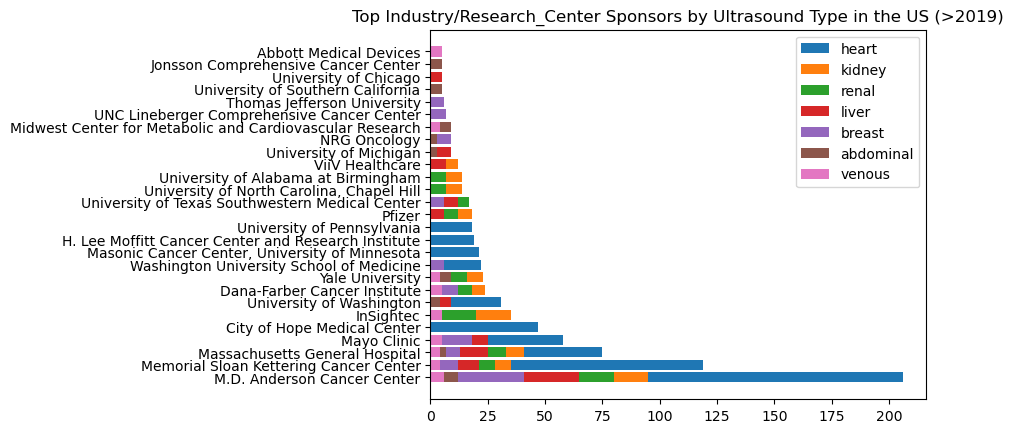

In [75]:
ultra_companies_sorted=[company.replace('+',' ').replace('%26','&') for company in ultra_companies_sorted]
sum_values=np.zeros(len(ultra_companies))
for values in ultra_companies_values_sorted:
    sum_values+=values
for ultrasound,values in zip(ultrasounds,ultra_companies_values_sorted):
    plt.barh(ultra_companies_sorted,sum_values,label=ultrasound)
    sum_values-=values
plt.legend()
plt.title('Top Industry/Research_Center Sponsors by Ultrasound Type in the US (>2019)')
plt.show()

In [239]:
url='https://classic.clinicaltrials.gov/api/query/study_fields?expr=ALL'
search_elig_crit='+AND+SEARCH[Study](AREA[EligibilityCriteria](ultrasound+OR+echocardiogram)+AND+AREA[LocationCountry]United+States'
search_date_type='+AND+AREA[CompletionDate]RANGE[2019,MAX]+AND+AREA[LeadSponsorClass](INDUSTRY+OR+OTHER))'
params='&min_rnk&max_rnk=1000&fields=ConditionBrowseLeafId&fmt=csv'
df_condition=pd.read_csv(url+search_elig_crit+search_date_type+params,skiprows=10)
df_condition_new=df_condition.ConditionBrowseLeafId.dropna().str.split('|',expand=True)
IDs=df_condition_new[0].tolist()
IDs_frequency=[IDs.count(ID) for ID in IDs]
dic=dict(zip(IDs,IDs_frequency))
dic={key:value for key,value in dic.items() if value >4}
Top_IDs=sorted(dic.items(),key=lambda x:x[1],reverse=True)[:15]
Top_IDs

url_check='https://classic.clinicaltrials.gov/api/query/study_fields?expr=ALL'
search_check='+AND+SEARCH[Study](AREA[ConditionBrowseLeafId]'
new_param=')&min_rnk&max_rnk=100&fields=Condition&fmt=csv'
top_conditions=[]
for ID,_ in Top_IDs:
    temp_df=pd.read_csv(url_check+search_check+ID+new_param,skiprows=10)
    temp_df_new=temp_df.Condition.str.split('|',expand=True)
    top_conditions.append(temp_df_new[0].value_counts().idxmax())

top_conditions=np.array(top_conditions)
top_conditions=np.unique(top_conditions)


url_sample='https://classic.clinicaltrials.gov/api/query/study_fields?expr=ALL'
search_sponsor_sample='+AND+SEARCH[Study](AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)+AND+AREA[Condition]('
search_date=')+AND+AREA[EligibilityCriteria]ultrasound+AREA[CompletionDate]RANGE[2019,MAX]+AND+AREA[LocationCountry]United+States)'
params_sample='&min_rnk&max_rnk=1000&fields=LeadSponsorClass%2CLeadSponsorName&fmt=csv'
sponsor_cond=[]
for condition in top_conditions:
    df_cond=pd.read_csv(url_sample+search_sponsor_sample+condition.replace(' ','+')
                        +search_date+params_sample,skiprows=10)
    companies=df_cond.LeadSponsorName.tolist()
    company_freq=[companies.count(company) for company in df_cond.LeadSponsorName]
    sponsor_cond.append([company.replace(' ','+').replace('&','%26') for freq,company 
                          in list(sorted(set(zip(company_freq,companies)),reverse=True))][:5])
url='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_sponsor='+AND+SEARCH[Study](AREA[EligibilityCriteria](ultrasound+OR+echocardiogram)+AND+AREA[LeadSponsorName]'
search_condition='+AND+AREA[LocationCountry]United+States+AND+AREA[Condition]'
search_date='+AND+AREA[CompletionDate]RANGE[2019,MAX]+AND+AREA[LeadSponsorClass](INDUSTRY+OR+OTHER))'
params='&field=Condition&fmt=xml'
sponsor_values_condition=[]
for condition,condition_companies in zip(top_conditions,sponsor_cond):
    sponsor_values=[]
    for company in condition_companies:
        sponsor_values.append(int(pd.read_xml(url+search_sponsor+company+search_condition+condition.replace(' ','+')
                                              +search_date+
                                              params).NStudiesFound.dropna()))      
    sponsor_values_condition.append(sponsor_values)
cond_companies=sorted(set([element for values,subset in zip(sponsor_values_condition,sponsor_cond)
         for value,element in zip(values,subset) if value>1]))
cond_companies_values=[]
for sponsors_type,values_type in zip(sponsor_cond,sponsor_values_condition):
    cond_sub_values=[]
    for company_in_set in cond_companies: 
        company_value=0
        for company,value in zip(sponsors_type,values_type):
            if company_in_set==company:
                company_value=value
        cond_sub_values.append(company_value)
    cond_companies_values.append(cond_sub_values)
cond_companies_values=np.array(cond_companies_values)

sum_of_companies=np.zeros(len(cond_companies_values[0]))
for values in cond_companies_values:
    sum_of_companies+=values
cond_companies_sorted=[company for _,company in sorted(zip(sum_of_companies,cond_companies),reverse=True)]
cond_companies_values_sorted=[]
for cond_companies_subset in cond_companies_values:
    subset=[]
    subset=[value for _,_,value in sorted(zip(sum_of_companies,cond_companies,cond_companies_subset),reverse=True)]
    cond_companies_values_sorted.append(subset)
cond_companies_values_sorted=np.array(cond_companies_values_sorted)

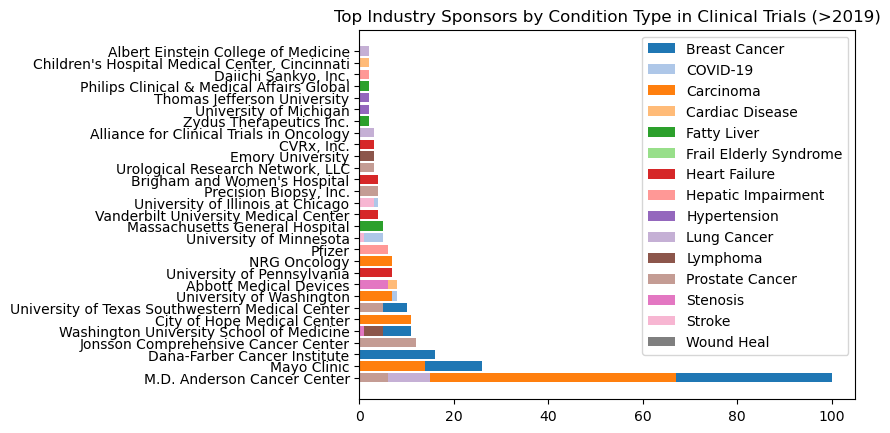

In [242]:
cond_companies_sorted=[company.replace('+',' ').replace('%26','&') for company in cond_companies_sorted]
sum_values=np.zeros(len(cond_companies))
for values in cond_companies_values_sorted:
    sum_values+=values
colors=matplotlib.colormaps['tab20']
i=0
for condition,values in zip(top_conditions,cond_companies_values_sorted):
    plt.barh(cond_companies_sorted,sum_values,label=condition,color=colors(i))
    sum_values-=values
    i+=1
plt.legend()
plt.title('Top Industry Sponsors by Condition Type in Clinical Trials (>2019)')
plt.show()

### Phases  <a class="anchor" id="Phases"></a>
In the cells below, the number of clinical trials meeting the following criteria is presented:

* Trials with eligibility criteria (inclusion or exclusion) involving the use of ultrasounds.
* Trials set to be completed from 2019 onwards.
* Tirals set in the United States 
* Trials whith sponsor that is not goverment

[1185, 1100, 846, 285, 119]


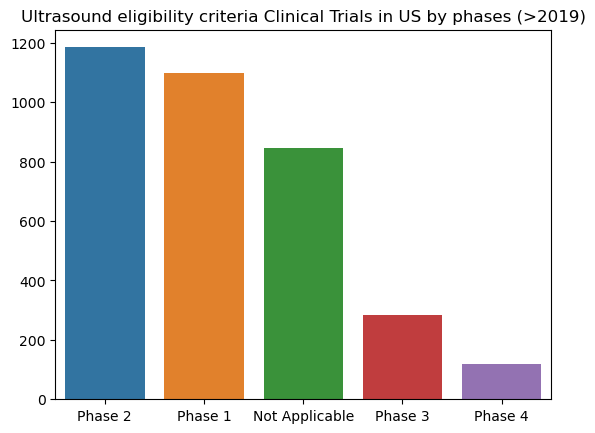

In [79]:
url='https://classic.clinicaltrials.gov/api/query/study_fields?expr=ALL'
search_ultra='+AND+SEARCH[Study](AREA[EligibilityCriteria](ultrasound+OR+echocardiogram)+AND+AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)'
search_phase='+AND+AREA[CompletionDate]RANGE[2019,MAX]+AND+AREA[LocationCountry]United+States+AND+AREA[Phase]'
params=')&field=Condition&fmt=xml'
phases=['Phase+1', 'Phase+2', 'Phase+3','Phase+4','Not+Applicable']
phase_values=[]
for phase in phases:
    phase_values.append(int(pd.read_xml(url+search_ultra+search_phase+phase+params).NStudiesFound.dropna()))
phases_sorted=[phase.replace('+',' ') for _,phase in sorted(zip(phase_values,phases),reverse=True)]
plot=sns.barplot(x=phases_sorted,y=sorted(phase_values,reverse=True))
print(sorted(phase_values,reverse=True))
plot.set(title='Ultrasound eligibility criteria Clinical Trials in US by phases (>2019)')
plt.show()

[[ 69  45  16  16  14  14  12  11  13  10]
 [102  66  15  20  22  10  12   6  10   3]
 [  3   0   0   2   0   1   0   3   0   0]
 [  1   0   3   2   0   0   0   1   1   1]
 [ 15   3  25  14   6   9   8  10   7   8]]


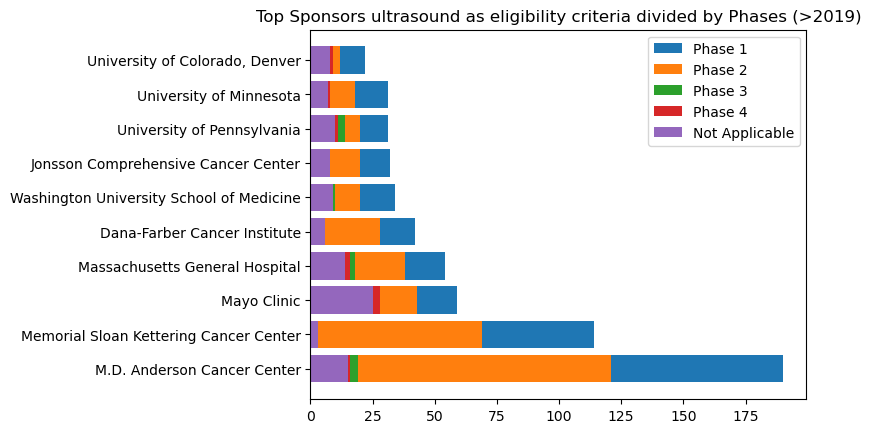

In [78]:
top_companies=[company.replace(' ','+').replace('&','%26') for company in companies_sorted[:10]]
url='https://classic.clinicaltrials.gov/api/query/study_fields?expr=ALL'
search_ultra='+AND+SEARCH[Study](AREA[EligibilityCriteria](ultrasound+OR+echocardiogram)+AND+AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)'
search_company='+AND+AREA[LeadSponsorName]'
search_phase='+AND+AREA[CompletionDate]RANGE[2019,MAX]+AND+AREA[LocationCountry]United+States+AND+AREA[Phase]'
params=')&field=Condition&fmt=xml'
values_company_phase=[]
for phase in phases:
    values_company=[]
    for company in top_companies:
        try:
            values_company.append(int(pd.read_xml(url+search_ultra+search_company+company+
                                                  search_phase+phase+params).NStudiesFound.dropna()))
        except ValueError:
            values_company.append(0)
    values_company_phase.append(values_company)
values_company_phase=np.array(values_company_phase)
phases_typo=[phase.replace('+',' ') for phase in phases]

sum_values=np.zeros(len(values_company_phase[0]))
for values in values_company_phase:
    sum_values+=values
    
top_companies_sorted=[company.replace('+',' ').replace('%26','&') 
                      for _,company in sorted(zip(sum_values,top_companies),reverse=True)]
values_company_phase_sorted=[]
for values in values_company_phase:
    new_value=[value for _,_,value in sorted(zip(sum_values,top_companies,values),reverse=True)]
    values_company_phase_sorted.append(new_value)
values_company_phase_sorted=np.array(values_company_phase_sorted)
sum_values=sorted(sum_values,reverse=True)
print(values_company_phase_sorted)
for phase,values in zip(phases_typo,values_company_phase_sorted):
    plt.barh(top_companies_sorted,sum_values,label=phase)
    sum_values-=values
plt.legend()
plt.title('Top Sponsors ultrasound as eligibility criteria divided by Phases (>2019)')
plt.show()

[1185, 1100, 846, 285, 119, 400]
[57335, 84813, 210879, 13905, 253020, 1190701]


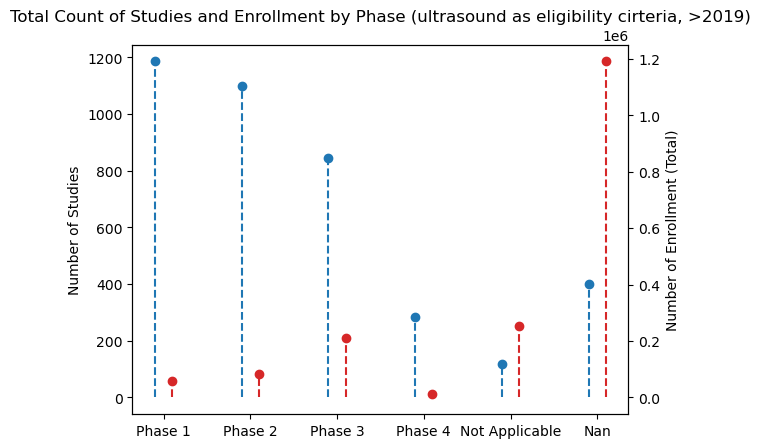

In [131]:
url='https://classic.clinicaltrials.gov/api/query/study_fields?expr=ALL'
search_ultrasound='+AND+SEARCH[Study](AREA[EligibilityCriteria](echocardiogram+OR+ultrasound)+AND+AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)'
search_date_country_phase='+AND+AREA[CompletionDate]RANGE[2019,MAX]+AND+AREA[LocationCountry]United+States+AND+AREA[Phase]'
params=')&min_rnk&max_rnk=1000&fields=EnrollmentCount%2CEnrollmentType&fmt=csv'
Enrollment_freq=[]
phases=['Phase+1', 'Phase+2', 'Phase+3','Phase+4','Not+Applicable']
phases_w_nan=[]
for phase in phases:
    df_Enrollment=pd.read_csv(url+search_ultrasound+search_date_country_phase+phase+params,skiprows=10)
    #must divide by lenght, because the size of the actual amount of studies can surpass 1000 and using study_fields 
    #(i.e. getting the actual dataframe and not quering by their own api) just show 1000 studies
    Enrollment_freq.append(df_Enrollment.EnrollmentCount.sum()/len(df_Enrollment))
Enrollment_freq
Total_Count=[round(avg*phase) for avg,phase in zip(Enrollment_freq,phase_values)]
df_Enrollment=pd.read_csv(url+search_ultrasound+search_date_country_phase+
                              '(NOT+(Phase+1+OR+Phase+2+OR+Phase+3+OR+Not+Applicable+OR+Phase+4))'+params,skiprows=10)
Total_Count.append(df_Enrollment.EnrollmentCount.sum())
phase_values_w_nan=[1185, 1100, 846, 285, 119]
phase_values_w_nan.append(len(df_Enrollment))
phases_w_nan=[phase.replace('+',' ') for phase in phases]
phases_w_nan.append('Nan')

print(phase_values_w_nan,Total_Count,sep='\n')
fig,ax1=plt.subplots()
ax1.set_ylabel('Number of Studies')
ax1.plot(np.arange(0,len(Total_Count))-0.1,phase_values_w_nan,linestyle='None',marker='o')
ax1.vlines(np.arange(0,len(Total_Count))-0.1,ymin=[0]*len(phase_values_w_nan),ymax=phase_values_w_nan,linestyle='--')
ax2=ax1.twinx()
ax2.plot(np.arange(0,len(Total_Count))+0.1,Total_Count,color='tab:red',marker='o',linestyle='None')
ax2.vlines(np.arange(0,len(Total_Count))+0.1,ymin=[0]*len(Total_Count),ymax=Total_Count,linestyle='--',color='tab:red')
ax1.set_xticks(np.arange(0,len(Total_Count)),phases_w_nan)
plt.ylabel('Number of Enrollment (Total)')
plt.title('Total Count of Studies and Enrollment by Phase (ultrasound as eligibility cirteria, >2019)')
plt.show()

[713, 777, 176, 46, 500, 209]
[44749, 72359, 151755, 8882, 184272, 203409]


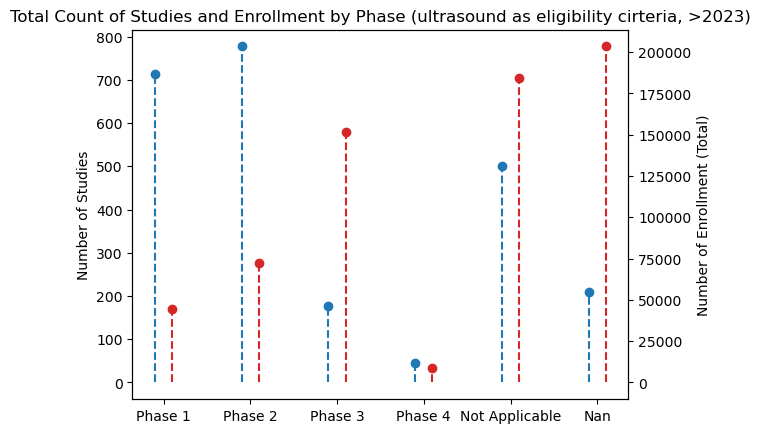

In [126]:
url='https://classic.clinicaltrials.gov/api/query/study_fields?expr=ALL'
search_ultrasound='+AND+SEARCH[Study](AREA[EligibilityCriteria](echocardiogram+OR+ultrasound)+AND+AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)'
search_date_country_phase='+AND+AREA[CompletionDate]RANGE[2023,MAX]+AND+AREA[LocationCountry]United+States+AND+AREA[Phase]'
params=')&min_rnk&max_rnk=1000&fields=EnrollmentCount%2CEnrollmentType&fmt=csv'
Total_Count_1_year=[]
Amount_phase=[]
phases=['Phase+1', 'Phase+2', 'Phase+3','Phase+4','Not+Applicable']
for phase in phases:
    df_Enrollment_1_year=pd.read_csv(url+search_ultrasound+search_date_country_phase+phase+params,skiprows=10)
    #in this case, because is just 1 year, the amount of studies doesn't surpass 1000
    Total_Count_1_year.append(df_Enrollment_1_year.EnrollmentCount.sum())
    Amount_phase.append(len(df_Enrollment_1_year))
df_Enrollment_1_year=pd.read_csv(url+search_ultrasound+search_date_country_phase+
                              '(NOT+(Phase+1+OR+Phase+2+OR+Phase+3+OR+Not+Applicable+OR+Phase+4))'+params,skiprows=10)
Total_Count_1_year.append(df_Enrollment_1_year.EnrollmentCount.sum())
Amount_phase.append(len(df_Enrollment_1_year))

print(Amount_phase,Total_Count_1_year,sep='\n')
fig,ax1=plt.subplots()
ax1.set_ylabel('Number of Studies')
ax1.plot(np.arange(0,len(Total_Count))-0.1,Amount_phase,linestyle='None',marker='o')
ax1.vlines(np.arange(0,len(Total_Count))-0.1,ymin=[0]*len(phase_values_w_nan),ymax=Amount_phase,linestyle='--')
ax2=ax1.twinx()
ax2.plot(np.arange(0,len(Total_Count))+0.1,Total_Count_1_year,color='tab:red',marker='o',linestyle='None')
ax2.vlines(np.arange(0,len(Total_Count))+0.1,ymin=[0]*len(Total_Count),ymax=Total_Count_1_year,
           linestyle='--',color='tab:red')
plt.ylabel('Number of Enrollment (Total)')
ax1.set_xticks(np.arange(0,len(Total_Count)),phases_w_nan)
plt.title('Total Count of Studies and Enrollment by Phase (ultrasound as eligibility cirteria, >2023)')
plt.show()

### Terminated  <a class="anchor" id="Terminated"></a>
In the cells below, the number of clinical trials meeting the following criteria is presented:

* Trials with eligibility criteria (inclusion or exclusion) involving the use of ultrasounds.
* Trials set to be completed from 2019 onwards.
* Tirals set in the United States 
* Trials whith sponsor that is not goverment
* Trials that are Terminated (i.e. the clinical trial couldn't continue, and it wont continue, for a lack of recruitment or other reason)

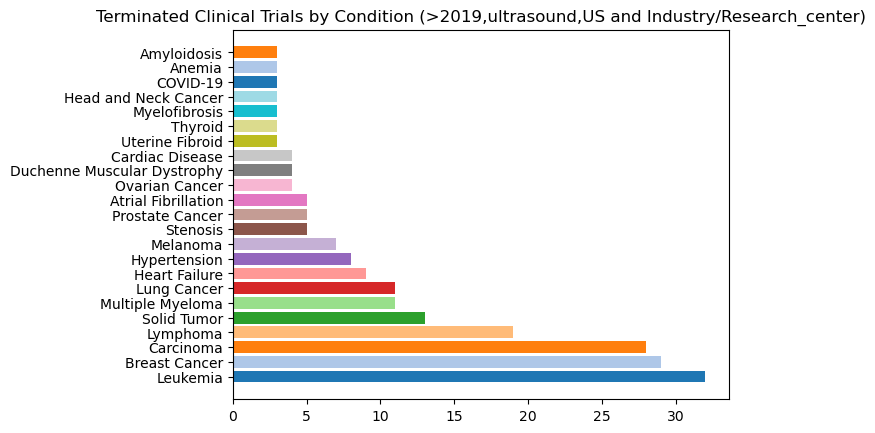

In [243]:
url_sample='https://classic.clinicaltrials.gov/api/query/study_fields?expr=ALL'
search_elig='+AND+SEARCH[Study](AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)+AND+AREA[EligibilityCriteria](ultrasound+OR+echocardiogram)'
search_stat='+AND+AREA[CompletionDate]RANGE[2019,MAX]+AND+AREA[LocationCountry]United+States+AND+AREA[OverallStatus]Terminated)'
params_sample='&min_rnk&max_rnk=1000&fields=ConditionBrowseLeafId&fmt=csv'
df_term=pd.read_csv(url_sample+search_elig+search_stat+params_sample,skiprows=10)
df_term_new=df_term.ConditionBrowseLeafId.dropna().str.split('|',expand=True)
IDs=df_term_new[0].tolist()
IDs_frequency=[IDs.count(ID) for ID in IDs]
dic=dict(zip(IDs,IDs_frequency))
dic={key:value for key,value in dic.items()}
Top_IDs=sorted(dic.items(),key=lambda x:x[1],reverse=True)[:40]

url_check='https://classic.clinicaltrials.gov/api/query/study_fields?expr=ALL'
search_check='+AND+SEARCH[Study](AREA[ConditionBrowseLeafId]'
new_param=')&min_rnk&max_rnk=100&fields=Condition&fmt=csv'
top_conditions=[]
for ID,_ in Top_IDs:
    temp_df=pd.read_csv(url_check+search_check+ID+new_param,skiprows=10)
    temp_df_new=temp_df.Condition.str.split('|',expand=True)
    top_conditions.append(temp_df_new[0].value_counts().idxmax())

top_conditions=np.array(top_conditions)
top_conditions=np.unique(top_conditions)

url='https://classic.clinicaltrials.gov/api/query/study_fields?expr=ALL'
search_elig='+AND+SEARCH[Study](AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)+AND+AREA[EligibilityCriteria](ultrasound+OR+echocardiogram)'
search_stat='+AND+AREA[CompletionDate]RANGE[2019,MAX]+AND+AREA[LocationCountry]United+States+AND+AREA[OverallStatus]Terminated'
search_condition='+AND+AREA[Condition]'
params=')&field=Condition&fmt=xml'
terminated_values=[]
for condition in top_conditions:
    try:
        terminated_values.append(int(pd.read_xml(url+search_elig+search_stat+search_condition+
                                                 condition.replace(' ','+')+params).NStudiesFound.dropna()))
    except:
        terminated_values.append(0)

conditions_sorted=[cond for value,cond in sorted(zip(terminated_values, top_conditions),reverse=True) if value>2]
terminated_values_sorted=[value for value in sorted(terminated_values,reverse=True) if value>2]

i=0

colors=matplotlib.colormaps['tab20']
for cond,value in zip(conditions_sorted,terminated_values_sorted):
    plt.barh(cond,value,color=colors(i%20))
    i+=1
plt.title('Terminated Clinical Trials by Condition (>2019,ultrasound,US and Industry/Research_center)')
plt.show()

# Movement Disease <a class="anchor" id="Movement"></a>

### Parkinson, Epilepsy, Multiple Sclerosis and Movement Diseases  Analysis<a class="anchor" id="Parkinson"></a>
In the cells below, the number of clinical trials meeting the following criteria is presented:

* Trials with  condition involving movement diseases.
* Trials set to be completed from 2019 onwards.
* Tirals set in the United States
* Trials whith sponsor that is not goverment


[757, 683, 319, 75, 65, 60, 54, 54, 53, 42, 26, 14, 7, 3]


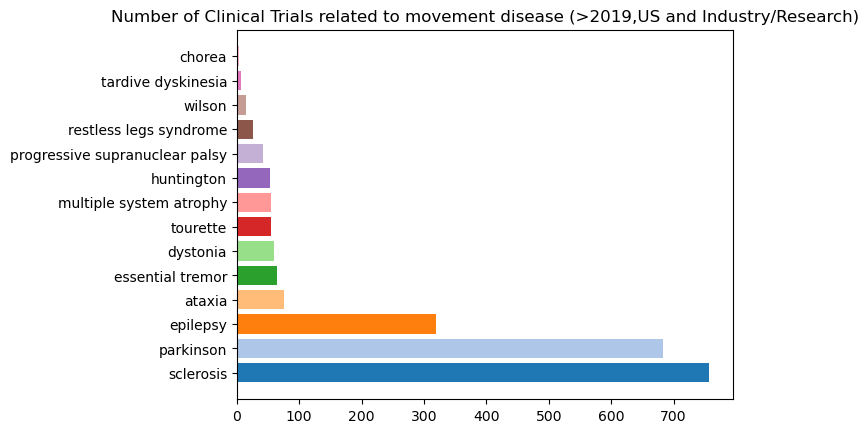

In [93]:
mov_diseases=['parkinson','huntington','tourette','dystonia','ataxia','restless legs syndrome','tardive dyskinesia',
             'essential tremor','multiple system atrophy','progressive supranuclear palsy','wilson','chorea','epilepsy',
             'sclerosis']
url='https://classic.clinicaltrials.gov/api/query/study_fields?expr=ALL'
search_sponsor='+AND+SEARCH[Study](AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)'
search_date_country='+AND+AREA[CompletionDate]RANGE[2019,MAX]+AND+AREA[LocationCountry]United+States'
search_condition='+AND+AREA[Condition]'
params=')&field=Condition&fmt=xml'

mov_values=[]
for mov_disease in mov_diseases:
    mov_values.append(int(pd.read_xml(url+search_sponsor+search_date_country+search_condition+mov_disease.replace(' ','+')
                                     +params).NStudiesFound.dropna()))

mov_values_sorted=sorted(mov_values,reverse=True)
mov_diseases_sorted=[dis for val,dis in sorted(zip(mov_values,mov_diseases),reverse=True)]
print(mov_values_sorted)
colors=matplotlib.colormaps['tab20']
i=0
for value,disease in zip(mov_values_sorted,mov_diseases_sorted):
    plt.barh(disease,value,color=colors(i))
    i+=1
plt.title('Number of Clinical Trials related to movement disease (>2019,US and Industry/Research)')
plt.show()

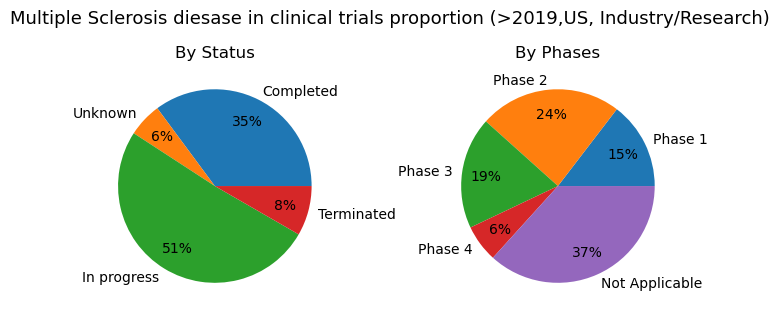

In [97]:
statuses=['Completed','Unknown','In progress','Terminated']
phases=['Phase 1', 'Phase 2', 'Phase 3','Phase 4','Not Applicable']
search_status='+AND+AREA[OverallStatus]'
search_phase='+AND+AREA[Phase]'
status_values,phases_values=[],[]
for status in statuses:
    if status=='In progress':
        status='(NOT+COMPLETED+AND+NOT+Unknown+AND+NOT+Terminated)'
    status_values.append(int(pd.read_xml(url+search_sponsor+search_date_country+search_condition+'sclerosis'+
                                         search_status+status+params).NStudiesFound.dropna()))

for phase in phases: 
    phases_values.append(int(pd.read_xml(url+search_sponsor+search_date_country+search_condition+'sclerosis'+
                                         search_phase+phase.replace(' ','+')+params).NStudiesFound.dropna()))

fig,axs=plt.subplots(1,2)
patches, labels, pct_texts= axs[0].pie(status_values,labels=statuses,autopct='%1.0f%%',pctdistance=0.75,labeldistance=1.1)
axs[0].set_title('By Status',y=1)
axs[1].pie(phases_values,labels=phases,autopct='%1.0f%%',pctdistance=0.75,labeldistance=1.1)
axs[1].set_title('By Phases',y=1)
fig.suptitle('Multiple Sclerosis diesase in clinical trials proportion (>2019,US, Industry/Research)',fontsize=13,y=0.85)
fig.tight_layout(pad=0)
plt.show()

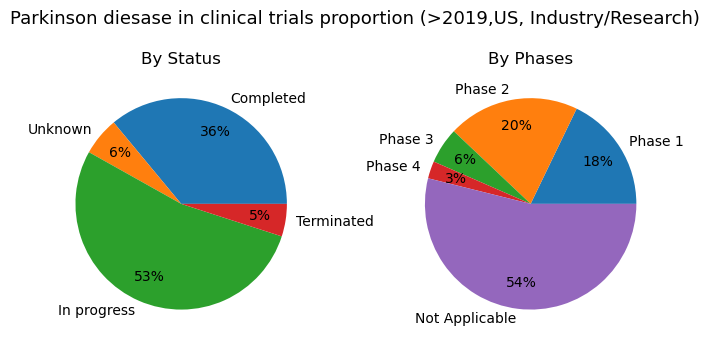

In [102]:
statuses=['Completed','Unknown','In progress','Terminated']
phases=['Phase 1', 'Phase 2', 'Phase 3','Phase 4','Not Applicable']
search_status='+AND+AREA[OverallStatus]'
search_phase='+AND+AREA[Phase]'
status_values,phases_values=[],[]
for status in statuses:
    if status=='In progress':
        status='(NOT+COMPLETED+AND+NOT+Unknown+AND+NOT+Terminated)'
    status_values.append(int(pd.read_xml(url+search_sponsor+search_date_country+search_condition+'parkinson'+
                                         search_status+status+params).NStudiesFound.dropna()))

for phase in phases: 
    phases_values.append(int(pd.read_xml(url+search_sponsor+search_date_country+search_condition+'parkinson'+
                                         search_phase+phase.replace(' ','+')+params).NStudiesFound.dropna()))

fig,axs=plt.subplots(1,2)
patches, labels, pct_texts= axs[0].pie(status_values,labels=statuses,autopct='%1.0f%%',pctdistance=0.75,labeldistance=1.1)
for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())
axs[0].set_title('By Status',y=1)
axs[1].pie(phases_values,labels=phases,autopct='%1.0f%%',pctdistance=0.75,labeldistance=1.1)
axs[1].set_title('By Phases',y=1)
fig.suptitle('Parkinson diesase in clinical trials proportion (>2019,US, Industry/Research)',fontsize=13,y=0.9)
fig.tight_layout(pad=-1)
plt.show()

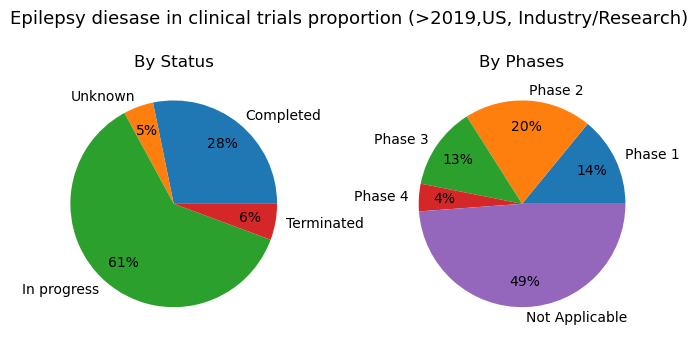

In [105]:
statuses=['Completed','Unknown','In progress','Terminated']
phases=['Phase 1', 'Phase 2', 'Phase 3','Phase 4','Not Applicable']
search_status='+AND+AREA[OverallStatus]'
search_phase='+AND+AREA[Phase]'
status_values,phases_values=[],[]
for status in statuses:
    if status=='In progress':
        status='(NOT+COMPLETED+AND+NOT+Unknown+AND+NOT+Terminated)'
    status_values.append(int(pd.read_xml(url+search_sponsor+search_date_country+search_condition+'epilepsy'+
                                         search_status+status+params).NStudiesFound.dropna()))

for phase in phases: 
    phases_values.append(int(pd.read_xml(url+search_sponsor+search_date_country+search_condition+'epilepsy'+
                                         search_phase+phase.replace(' ','+')+params).NStudiesFound.dropna()))

fig,axs=plt.subplots(1,2)
patches, labels, pct_texts= axs[0].pie(status_values,labels=statuses,autopct='%1.0f%%',pctdistance=0.75,labeldistance=1.1)
for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())
axs[0].set_title('By Status',y=1)
axs[1].pie(phases_values,labels=phases,autopct='%1.0f%%',pctdistance=0.75,labeldistance=1.1)
axs[1].set_title('By Phases',y=1)
fig.suptitle('Epilepsy diesase in clinical trials proportion (>2019,US, Industry/Research)',fontsize=13,y=0.9)
fig.tight_layout(pad=-1)
plt.show()

[[ 74.  92.  92. 102. 100. 122.  68.]
 [ 71.  79.  89.  99.  87.  90.  93.]
 [ 21.  32.  44.  33.  31.  46.  46.]]


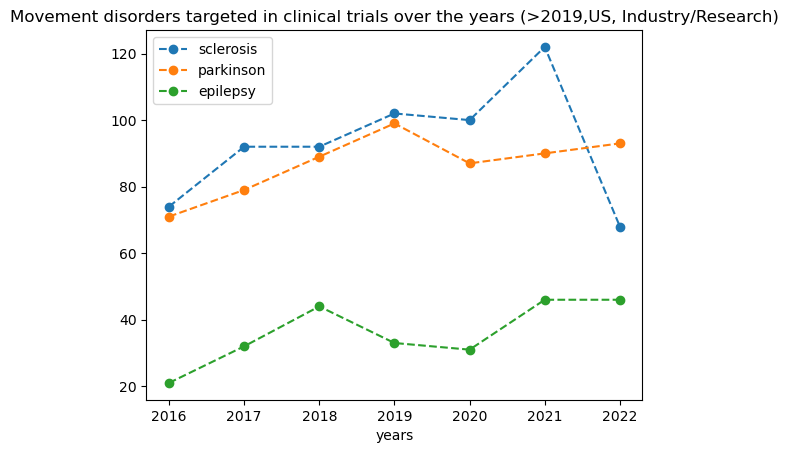

In [106]:
years=range(2016,2023)
search_country_date='+AND+AREA[LocationCountry]United+States+AND+AREA[StartDate]'
mov_diseases=['sclerosis','parkinson','epilepsy']
mov_over_time=np.zeros((3,len(years)))
i=0
for disease in mov_diseases:
    for year in years:
        mov_over_time[i][year-2016]=int(pd.read_xml(url+search_sponsor+search_country_date+str(year)+search_condition
                                                    +disease+params).NStudiesFound.dropna())
    i+=1
print(mov_over_time)

i=0
for disease_over_time in mov_over_time:
    plt.plot(disease_over_time,label=mov_diseases[i],marker='o',linestyle='--')
    i=i+1
plt.legend()
plt.title('Movement disorders targeted in clinical trials over the years (>2019,US, Industry/Research)')
plt.xlabel('years')
plt.xticks(np.arange(len(years)),years)
plt.show()

In [ ]:
# the ammount of clinical trials doesn't surpass 1000 in this case, so it's okay tu use
url='https://classic.clinicaltrials.gov/api/query/study_fields?expr=ALL'
search_sponsor='+AND+SEARCH[Study](AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)'
search_date_country='+AND+AREA[CompletionDate]RANGE[2019,MAX]+AND+AREA[LocationCountry]United+States'
search_condition='+AND+AREA[Condition]'
params=')&min_rnk&max_rnk=1000&fields=LeadSponsorName&fmt=csv'
mov_diseases=['sclerosis','parkinson','epilepsy']
sponsor_mov, sponsor_freq=[], []
for disease in mov_diseases:
    df_sponsor=pd.read_csv(url+search_sponsor+search_date_country+search_condition+disease+params,skiprows=10)
    companies=df_sponsor.LeadSponsorName.tolist()
    company_freq=[companies.count(company) for company in df_sponsor.LeadSponsorName]
    sponsor_mov.append(dict(zip(companies,company_freq)))
print(sponsor_mov,sep='\n')

### Parkinson, Epilepsy and Multiple Sclerosis Top Sponsors <a class="anchor" id="Epilepsy"></a>
In the cell below, the number of clinical trials meeting the following criteria is presented:

* Trials with  condition involving Parkinson, Epilepsy and Multiple Sclerosis.
* Trials set to be completed from 2019 onwards.
* Tirals set in the United States
* Trials whith sponsor that is not goverment

[29, 24, 22, 22, 21]
[22, 17, 17, 15, 13]
[14, 12, 9, 8, 7]


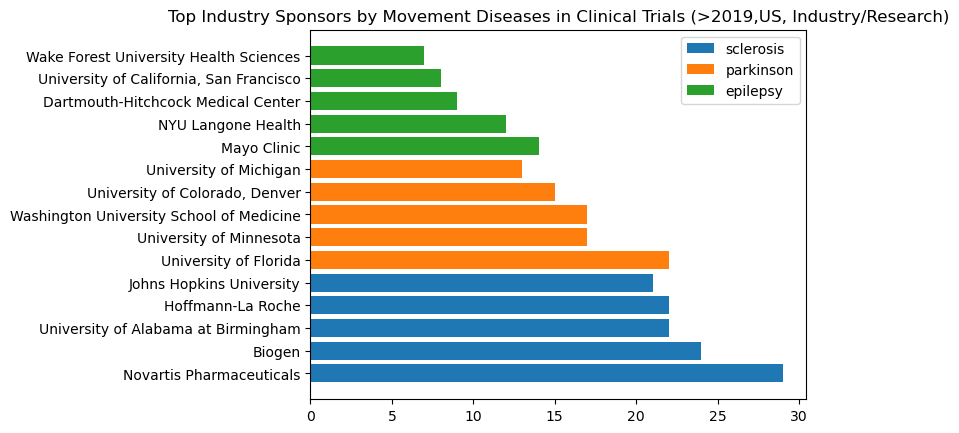

In [147]:
for disease,sponsors_disease in zip(mov_diseases,sponsor_mov):
    sponsors,values=[],[]
    for sponsor,value in sorted(sponsors_disease.items(),key=lambda x:x[1],reverse=True)[:5]:
        sponsors.append(sponsor)
        values.append(value)
    print(values)
    plt.barh(sponsors,values,label=disease)
plt.title('Top Industry Sponsors by Movement Diseases in Clinical Trials (>2019,US, Industry/Research)')
plt.legend()
plt.show()

### Movment Diseases and Other Diseases Enrollment Count <a class="anchor" id="mov_dis"></a>
In the cells below, the number of clinical trials meeting the following criteria is presented:

* Trials with  condition involving movement diseases (parkinson, huntington disease, tourette, dystonia, ataxia, restless legs syndrome, tardive dyskinesia, essential tremor, multiple system atrophy, progressive supranuclear palsy, wilson, chorea, epilepsy, sclerosis) and other diseases (stroke, autism, schizophrenia, sleep apnea, parasomnia, arthritis and dysarthria).
* Trials set to be completed from 2019 onwards and 2023 onwards.
* Tirals set in the United States
* Trials whith sponsor that is not goverment

[5448, 24772, 45488, 6514, 42704, 2061868]
[139, 201, 114, 42, 397, 312]


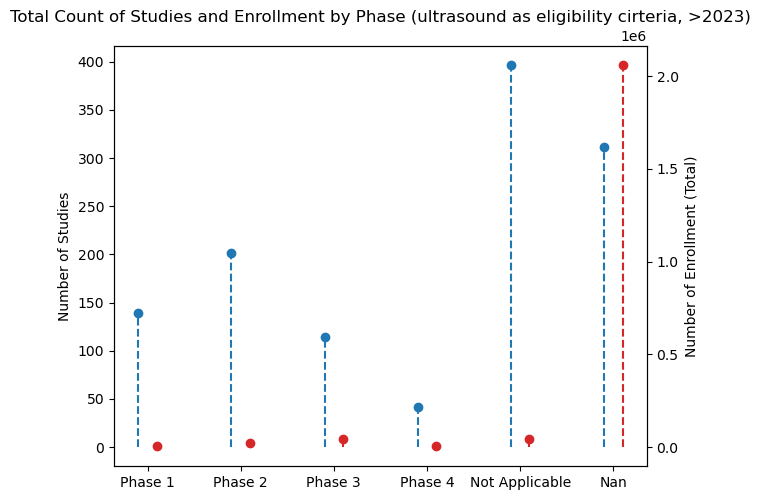

In [30]:
mov_diseases=['parkinson','huntington','tourette','dystonia','ataxia','restless legs syndrome','tardive dyskinesia',
             'essential tremor','multiple system atrophy','progressive supranuclear palsy','wilson','chorea','epilepsy',
             'sclerosis']
condition_grouped=''
for disease in mov_diseases:
    if disease=='sclerosis':
        condition_grouped+=disease
    else:
        condition_grouped+=disease.replace(' ','+')+'+OR+'
dates=['[2019,MAX]','[2023,MAX]']
url='https://classic.clinicaltrials.gov/api/query/study_fields?expr=ALL'
search_diseases='+AND+SEARCH[Study](AREA[Condition]('+condition_grouped+')+AND+AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)'
search_date='+AND+AREA[CompletionDate]RANGE'
search_country_phase='+AND+AREA[LocationCountry]United+States+AND+AREA[Phase]('
params='))&min_rnk&max_rnk=1000&fields=EnrollmentCount&fmt=csv'
Total_Count_1_year, Total_Count_3_years, Num_Studies_1_year, Num_Studies_3_years =[],[],[],[]
phases=['Phase+1', 'Phase+2', 'Phase+3','Phase+4','Not+Applicable']
nans=''
for phase in phases:
    df_Enrollment_1=pd.read_csv(url+search_diseases+search_date+dates[1]+search_country_phase+phase+params,skiprows=10)
    df_Enrollment_3=pd.read_csv(url+search_diseases+search_date+dates[0]+search_country_phase+phase+params,skiprows=10)
    Total_Count_1_year.append(df_Enrollment_1.EnrollmentCount.sum())
    Total_Count_3_years.append(df_Enrollment_3.EnrollmentCount.sum())
    Num_Studies_1_year.append(len(df_Enrollment_1))
    Num_Studies_3_years.append(len(df_Enrollment_3))
    if phase=='Not+Applicable':
        nans+=phase+')'
    else:
        nans+=phase+'+OR+'
df_Enrollment_1=pd.read_csv(url+search_diseases+search_date+dates[1]+search_country_phase+'NOT+('+nans+params,skiprows=10)
df_Enrollment_3=pd.read_csv(url+search_diseases+search_date+dates[0]+search_country_phase+'NOT+('+nans+params,skiprows=10)
Total_Count_1_year.append(df_Enrollment_1.EnrollmentCount.sum())
Total_Count_3_years.append(df_Enrollment_3.EnrollmentCount.sum())
Num_Studies_1_year.append(len(df_Enrollment_1))
Num_Studies_3_years.append(len(df_Enrollment_3))

print(Total_Count_1_year,Num_Studies_1_year,sep='\n')
phase_values_w_nan=[phase.replace('+',' ') for phase in phases]
phase_values_w_nan.append('Nan')
fig,axs=plt.subplots()
axs.set_ylabel('Number of Studies')
axs.plot(np.arange(0,len(Total_Count_1_year))-0.1,Num_Studies_1_year,linestyle='None',marker='o')
axs.vlines(np.arange(0,len(Total_Count_1_year))-0.1,ymin=[0]*len(phase_values_w_nan),
              ymax=Num_Studies_1_year,linestyle='--')
ax1=axs.twinx()
ax1.plot(np.arange(0,len(Total_Count_1_year))+0.1,Total_Count_1_year,color='tab:red',marker='o',linestyle='None')
ax1.vlines(np.arange(0,len(Total_Count_1_year))+0.1,ymin=[0]*len(Total_Count_1_year),ymax=Total_Count_1_year,
           linestyle='--',color='tab:red')
plt.ylabel('Number of Enrollment (Total)')
axs.set_xticks(np.arange(0,len(Total_Count_1_year)),phase_values_w_nan)
plt.title('Total Count of Studies and Enrollment by Phase (movement diseases,US, >2023)')
fig.tight_layout(pad=0)
plt.show()

[9318, 38589, 75426, 10696, 62979, 2149253]
[265, 374, 208, 78, 730, 506]


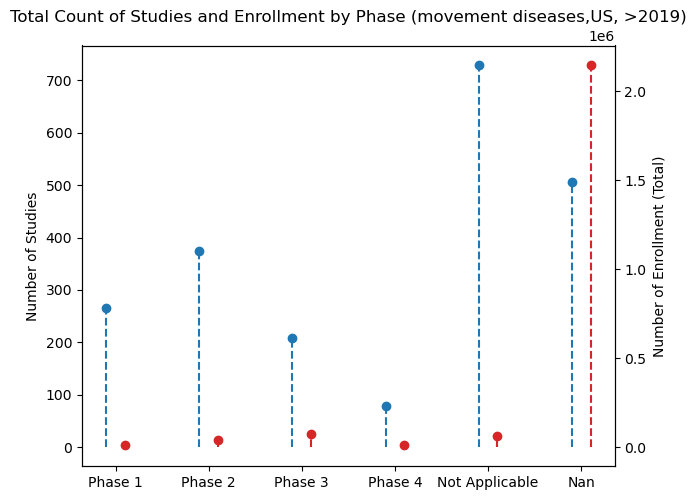

In [31]:
print(Total_Count_3_years,Num_Studies_3_years,sep='\n')
fig,axs=plt.subplots()
axs.set_ylabel('Number of Studies')
axs.plot(np.arange(0,len(Total_Count_1_year))-0.1,Num_Studies_3_years,linestyle='None',marker='o')
axs.vlines(np.arange(0,len(Total_Count_1_year))-0.1,ymin=[0]*len(phase_values_w_nan),
              ymax=Num_Studies_3_years,linestyle='--')
ax1=axs.twinx()
ax1.plot(np.arange(0,len(Total_Count_1_year))+0.1,Total_Count_3_years,color='tab:red',marker='o',linestyle='None')
ax1.vlines(np.arange(0,len(Total_Count_1_year))+0.1,ymin=[0]*len(Total_Count_1_year),ymax=Total_Count_3_years,
           linestyle='--',color='tab:red')
plt.ylabel('Number of Enrollment (Total)')
axs.set_xticks(np.arange(0,len(Total_Count_1_year)),phase_values_w_nan)
plt.title('Total Count of Studies and Enrollment by Phase (movement diseases,US, >2019)')
fig.tight_layout(pad=0)
plt.show()

[5676, 25353, 103214, 35142, 217768, 4428282]
[90, 185, 128, 54, 817, 310]


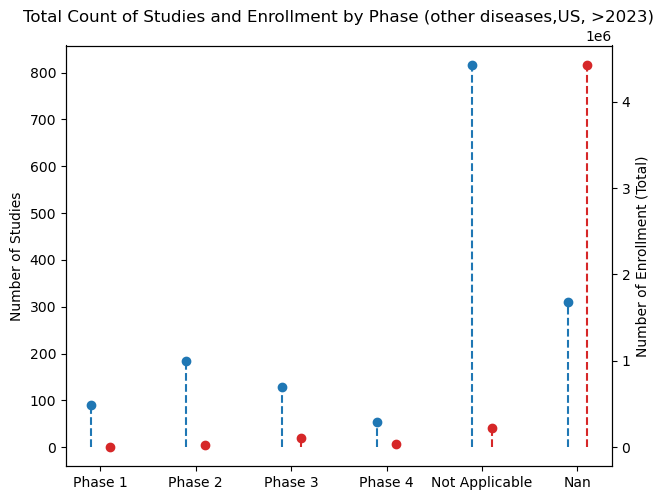

In [35]:
other_diseases=['stroke','autism','schizophrenia','sleep+apnea','parasomnia','arthritis','dysarthria']
condition_grouped=''
for disease in other_diseases:
    if disease=='dysarthria':
        condition_grouped+=disease
    else:
        condition_grouped+=disease.replace(' ','+')+'+OR+'
dates=['[2019,MAX]','[2023,MAX]']
url='https://classic.clinicaltrials.gov/api/query/study_fields?expr=ALL'
url_more='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_diseases='+AND+SEARCH[Study](AREA[Condition]('+condition_grouped+')+AND+AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)'
search_date='+AND+AREA[CompletionDate]RANGE'
search_country_phase='+AND+AREA[LocationCountry]United+States+AND+AREA[Phase]('
params='))&min_rnk&max_rnk=1000&fields=EnrollmentCount&fmt=csv'
params_more='))&field=EnrollmentCount&fmt=xml'
Total_Count_1_year, Total_Count_3_years, Num_Studies_1_year, Num_Studies_3_years =[],[],[],[]
phases=['Phase+1', 'Phase+2', 'Phase+3','Phase+4','Not+Applicable']
nans=''
for phase in phases:
    df_Enrollment_1=pd.read_csv(url+search_diseases+search_date+dates[1]+search_country_phase+phase+params,skiprows=10)
    df_Enrollment_3=pd.read_csv(url+search_diseases+search_date+dates[0]+search_country_phase+phase+params,skiprows=10)
    if len(df_Enrollment_3)==1000:
        actual_length=int(pd.read_xml(url_more+search_diseases+search_date+dates[0]+
                                      search_country_phase+phase+params_more).NStudiesFound.dropna())
        Num_Studies_3_years.append(actual_length)
        Total_Count_3_years.append(int((df_Enrollment_3.EnrollmentCount.sum()/1000)*actual_length))
    else:
        Total_Count_3_years.append(df_Enrollment_3.EnrollmentCount.sum())
        Num_Studies_3_years.append(len(df_Enrollment_3))
    Total_Count_1_year.append(df_Enrollment_1.EnrollmentCount.sum())
    Num_Studies_1_year.append(len(df_Enrollment_1))
    if phase=='Not+Applicable':
        nans+=phase+')'
    else:
        nans+=phase+'+OR+'
df_Enrollment_1=pd.read_csv(url+search_diseases+search_date+dates[1]+search_country_phase+'NOT+('+nans+params,skiprows=10)
df_Enrollment_3=pd.read_csv(url+search_diseases+search_date+dates[0]+search_country_phase+'NOT+('+nans+params,skiprows=10)
Total_Count_1_year.append(df_Enrollment_1.EnrollmentCount.sum())
Total_Count_3_years.append(df_Enrollment_3.EnrollmentCount.sum())
Num_Studies_1_year.append(len(df_Enrollment_1))
Num_Studies_3_years.append(len(df_Enrollment_3))

print(Total_Count_1_year,Num_Studies_1_year,sep='\n')
phase_values_w_nan=[phase.replace('+',' ') for phase in phases]
phase_values_w_nan.append('Nan')
fig,axs=plt.subplots()
axs.set_ylabel('Number of Studies')
axs.plot(np.arange(0,len(Total_Count_1_year))-0.1,Num_Studies_1_year,linestyle='None',marker='o')
axs.vlines(np.arange(0,len(Total_Count_1_year))-0.1,ymin=[0]*len(phase_values_w_nan),
              ymax=Num_Studies_1_year,linestyle='--')
ax1=axs.twinx()
ax1.plot(np.arange(0,len(Total_Count_1_year))+0.1,Total_Count_1_year,color='tab:red',marker='o',linestyle='None')
ax1.vlines(np.arange(0,len(Total_Count_1_year))+0.1,ymin=[0]*len(Total_Count_1_year),ymax=Total_Count_1_year,
           linestyle='--',color='tab:red')
plt.ylabel('Number of Enrollment (Total)')
axs.set_xticks(np.arange(0,len(Total_Count_1_year)),phase_values_w_nan)
plt.title('Total Count of Studies and Enrollment by Phase (other diseases,US, >2023)')
fig.tight_layout(pad=0)
plt.show()

[14087, 44375, 143161, 43256, 239612, 10499598]
[222, 318, 212, 98, 1468, 528]


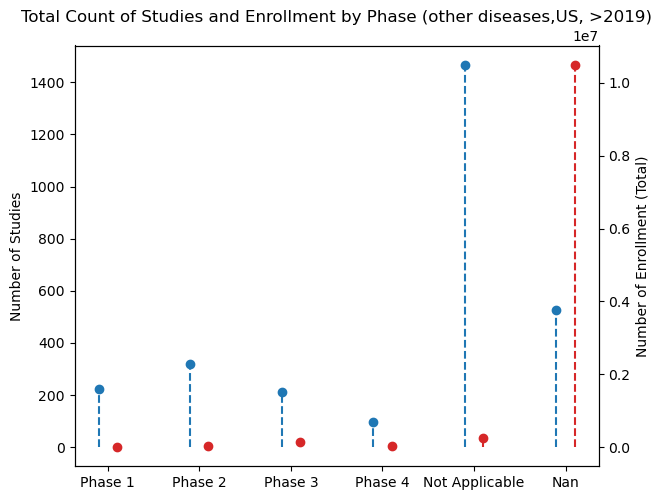

In [37]:
print(Total_Count_3_years,Num_Studies_3_years,sep='\n')
fig,axs=plt.subplots()
axs.set_ylabel('Number of Studies')
axs.plot(np.arange(0,len(Total_Count_1_year))-0.1,Num_Studies_3_years,linestyle='None',marker='o')
axs.vlines(np.arange(0,len(Total_Count_1_year))-0.1,ymin=[0]*len(phase_values_w_nan),
              ymax=Num_Studies_3_years,linestyle='--')
ax1=axs.twinx()
ax1.plot(np.arange(0,len(Total_Count_1_year))+0.1,Total_Count_3_years,color='tab:red',marker='o',linestyle='None')
ax1.vlines(np.arange(0,len(Total_Count_1_year))+0.1,ymin=[0]*len(Total_Count_1_year),ymax=Total_Count_3_years,
           linestyle='--',color='tab:red')
plt.ylabel('Number of Enrollment (Total)')
axs.set_xticks(np.arange(0,len(Total_Count_1_year)),phase_values_w_nan)
plt.title('Total Count of Studies and Enrollment by Phase (other diseases,US, >2019)')
fig.tight_layout(pad=0)
plt.show()

### Gait analysis <a class="anchor" id="gait"></a>
In the cell below, the number of clinical trials meeting the following criteria is presented:

* Trials with gait as eligibility criteria.
* Trials set to be completed from 2019 onwards.
* Tirals set in the United States
* Trials whith sponsor that is not goverment

In [38]:
url='https://classic.clinicaltrials.gov/api/query/study_fields?expr=ALL'
search_sponsor='+AND+SEARCH[Study](AREA[LeadSponsorClass](INDUSTRY+OR+OTHER)'
search_date_country='+AND+AREA[CompletionDate]RANGE[2019,MAX]+AND+AREA[LocationCountry]United+States'
search_elig_crit='+AND+AREA[Condition]gait'
params=')&field=Condition&fmt=xml'

value=int(pd.read_xml(url+search_sponsor+search_date_country+search_elig_crit+params).NStudiesFound.dropna())
print("Number of trials with Gait as eligibility criteria (>2019): "+str(value))

Number of trials with Gait as eligibility criteria (>2019): 69
